<h1 align='center' style='color:blue'>Credit Risk Modeling Project</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.float_format',lambda x : "{:.2f}".format(x))
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
df= pd.merge(df_customers,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df, df_bureau, on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default']=df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

default is a target variable and we can see some class imbalance here. We will address it later on.

### Train Test split

We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering. 

In [11]:
X=df.drop("default",axis=1)
y=df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

df_train= pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

df_train.head(3)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0


<h3 align="center" style="color:blue">Data Cleaning</h3>

### Handle Missing & Duplicate Values

In [12]:
df_train.shape

(37500, 33)

In [13]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
mode_residence = df_train['residence_type'].mode()[0]
mode_residence

'Owned'

In [16]:
df_train['residence_type'].fillna(mode_residence,inplace=True)
df_test['residence_type'].fillna(mode_residence,inplace=True)
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [17]:
df_train.duplicated().sum()

0

In [18]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,1333819.51,986298.87,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,1213674.44,1043145.01,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,422197.50,287040.25,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,997427.50,665014.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,1784879.00,1234062.75,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

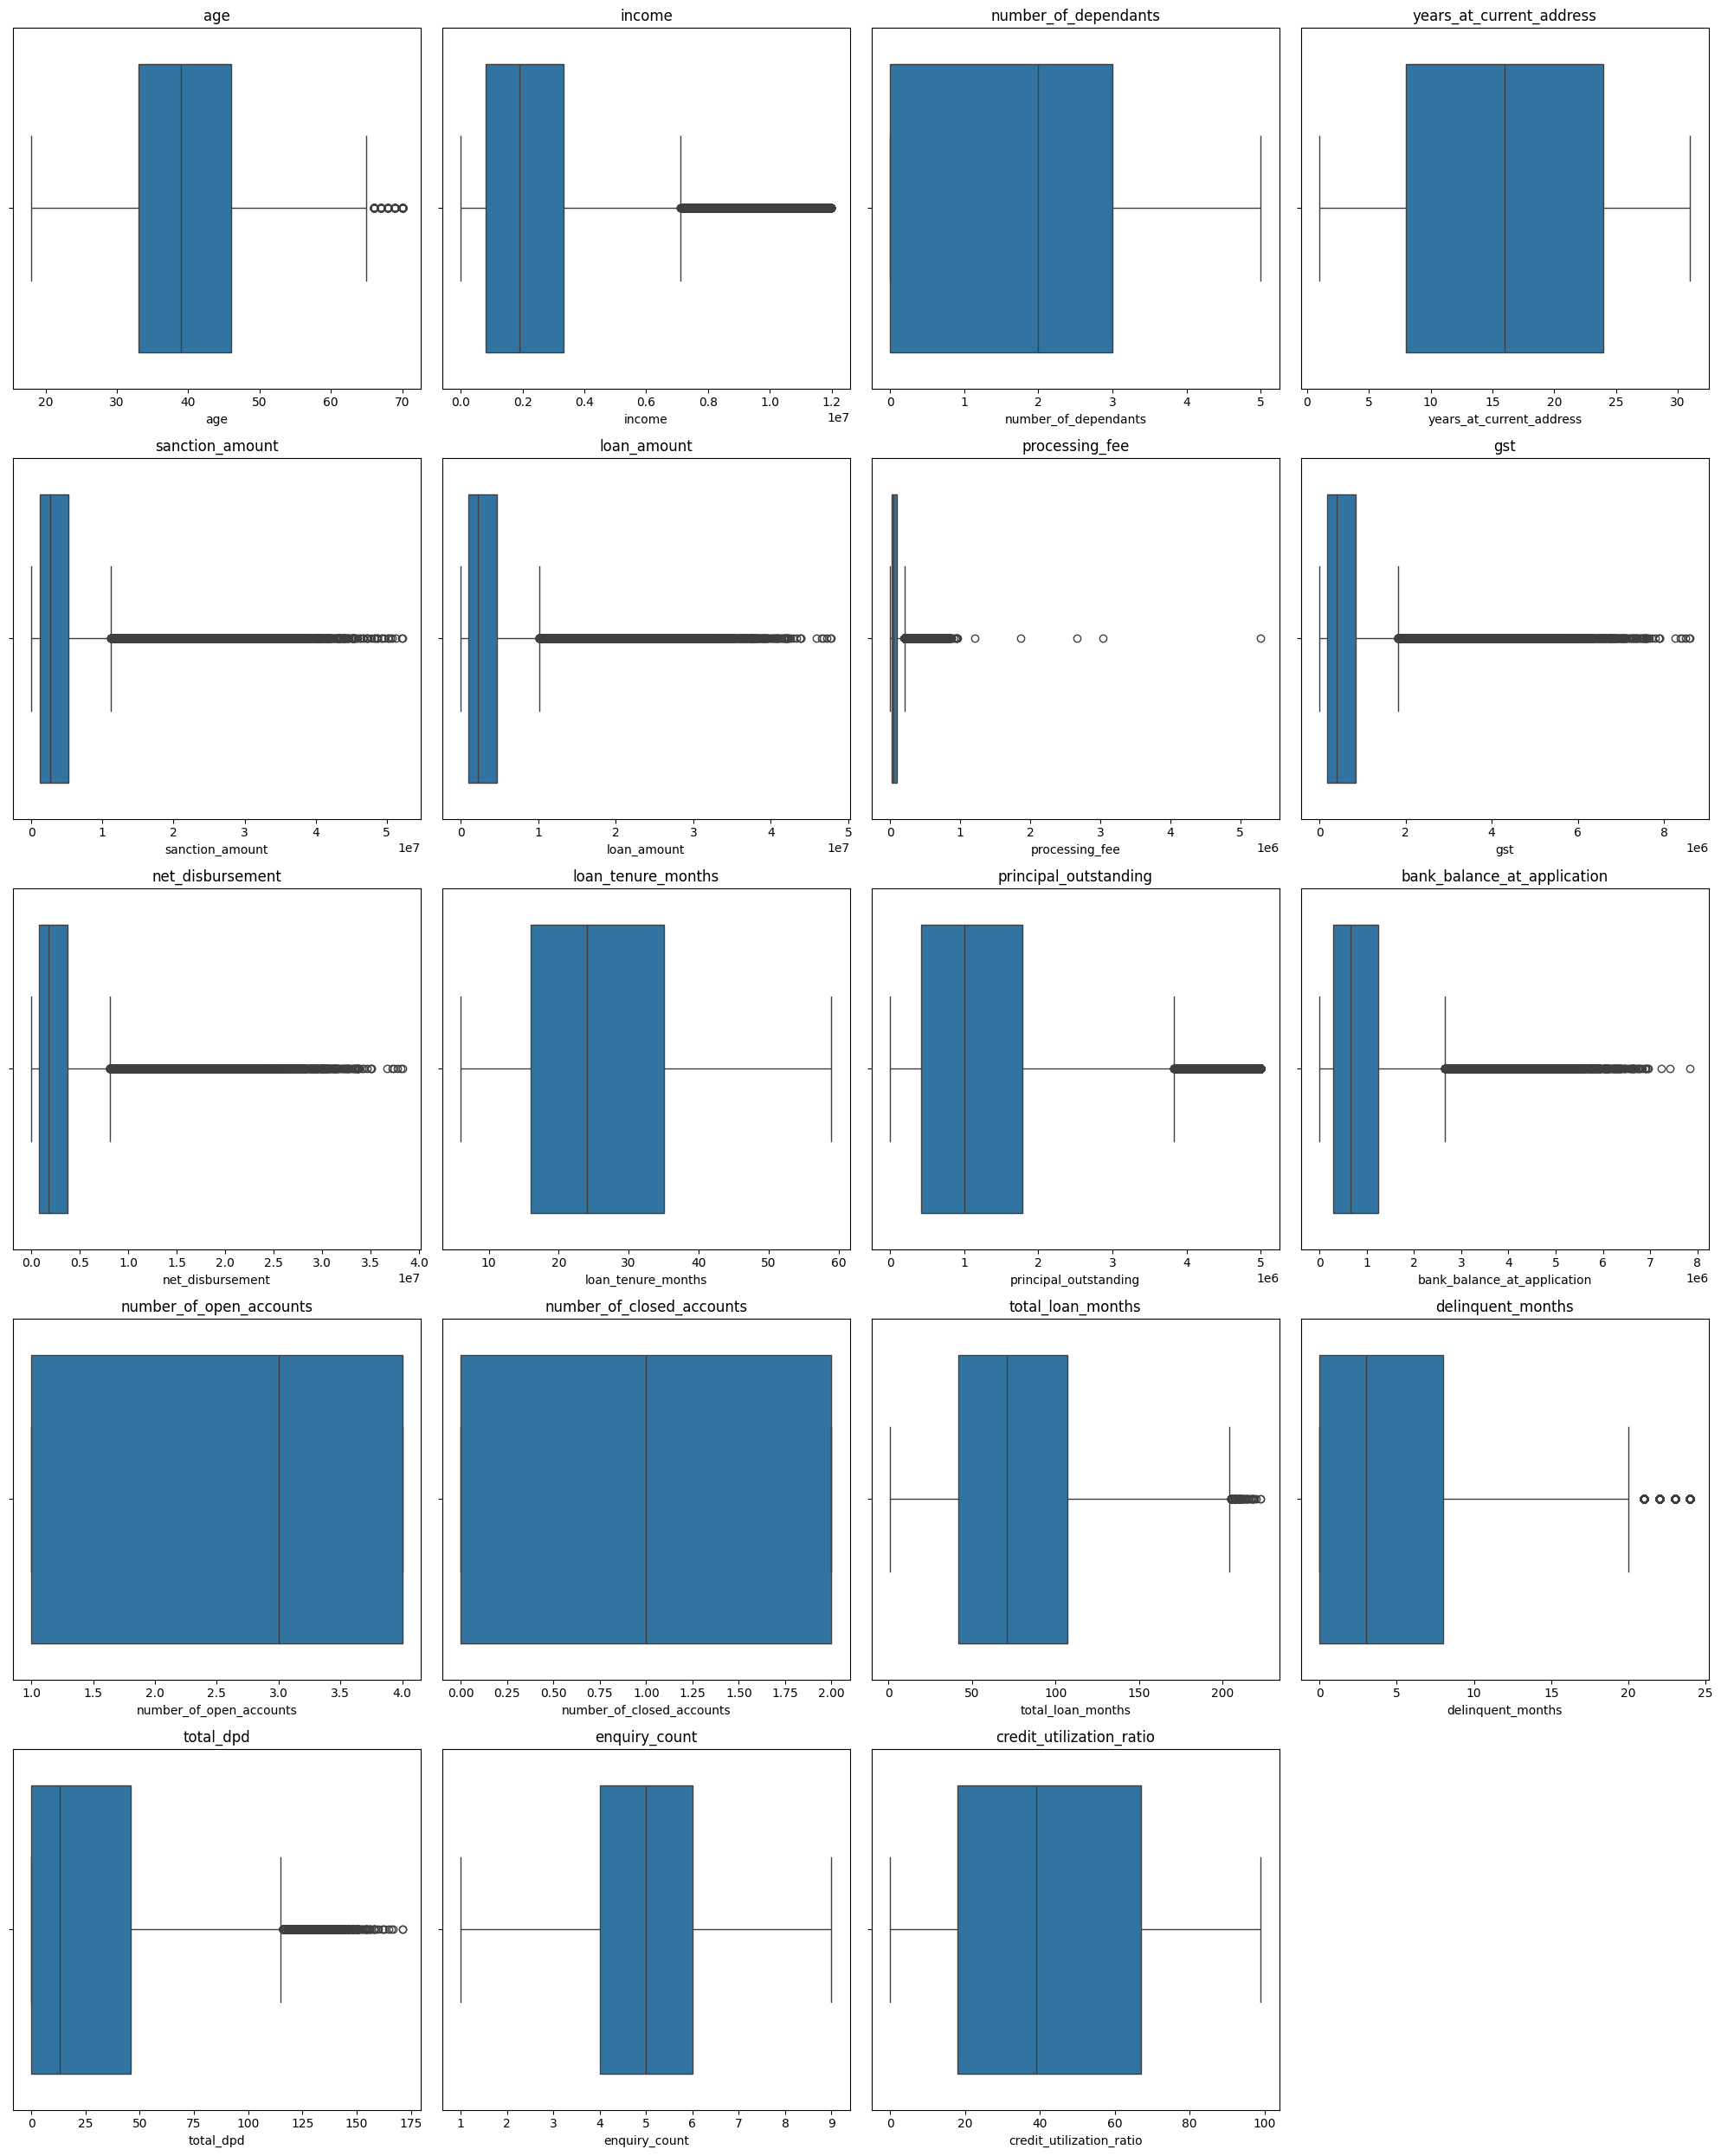

In [21]:
num_plots= len(columns_continuous)
num_col = 4
num_rows = (num_plots + num_col - 1) // num_col

fig, axes = plt.subplots(num_rows,num_col , figsize = (5*num_col,5*num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col],ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, num_col*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

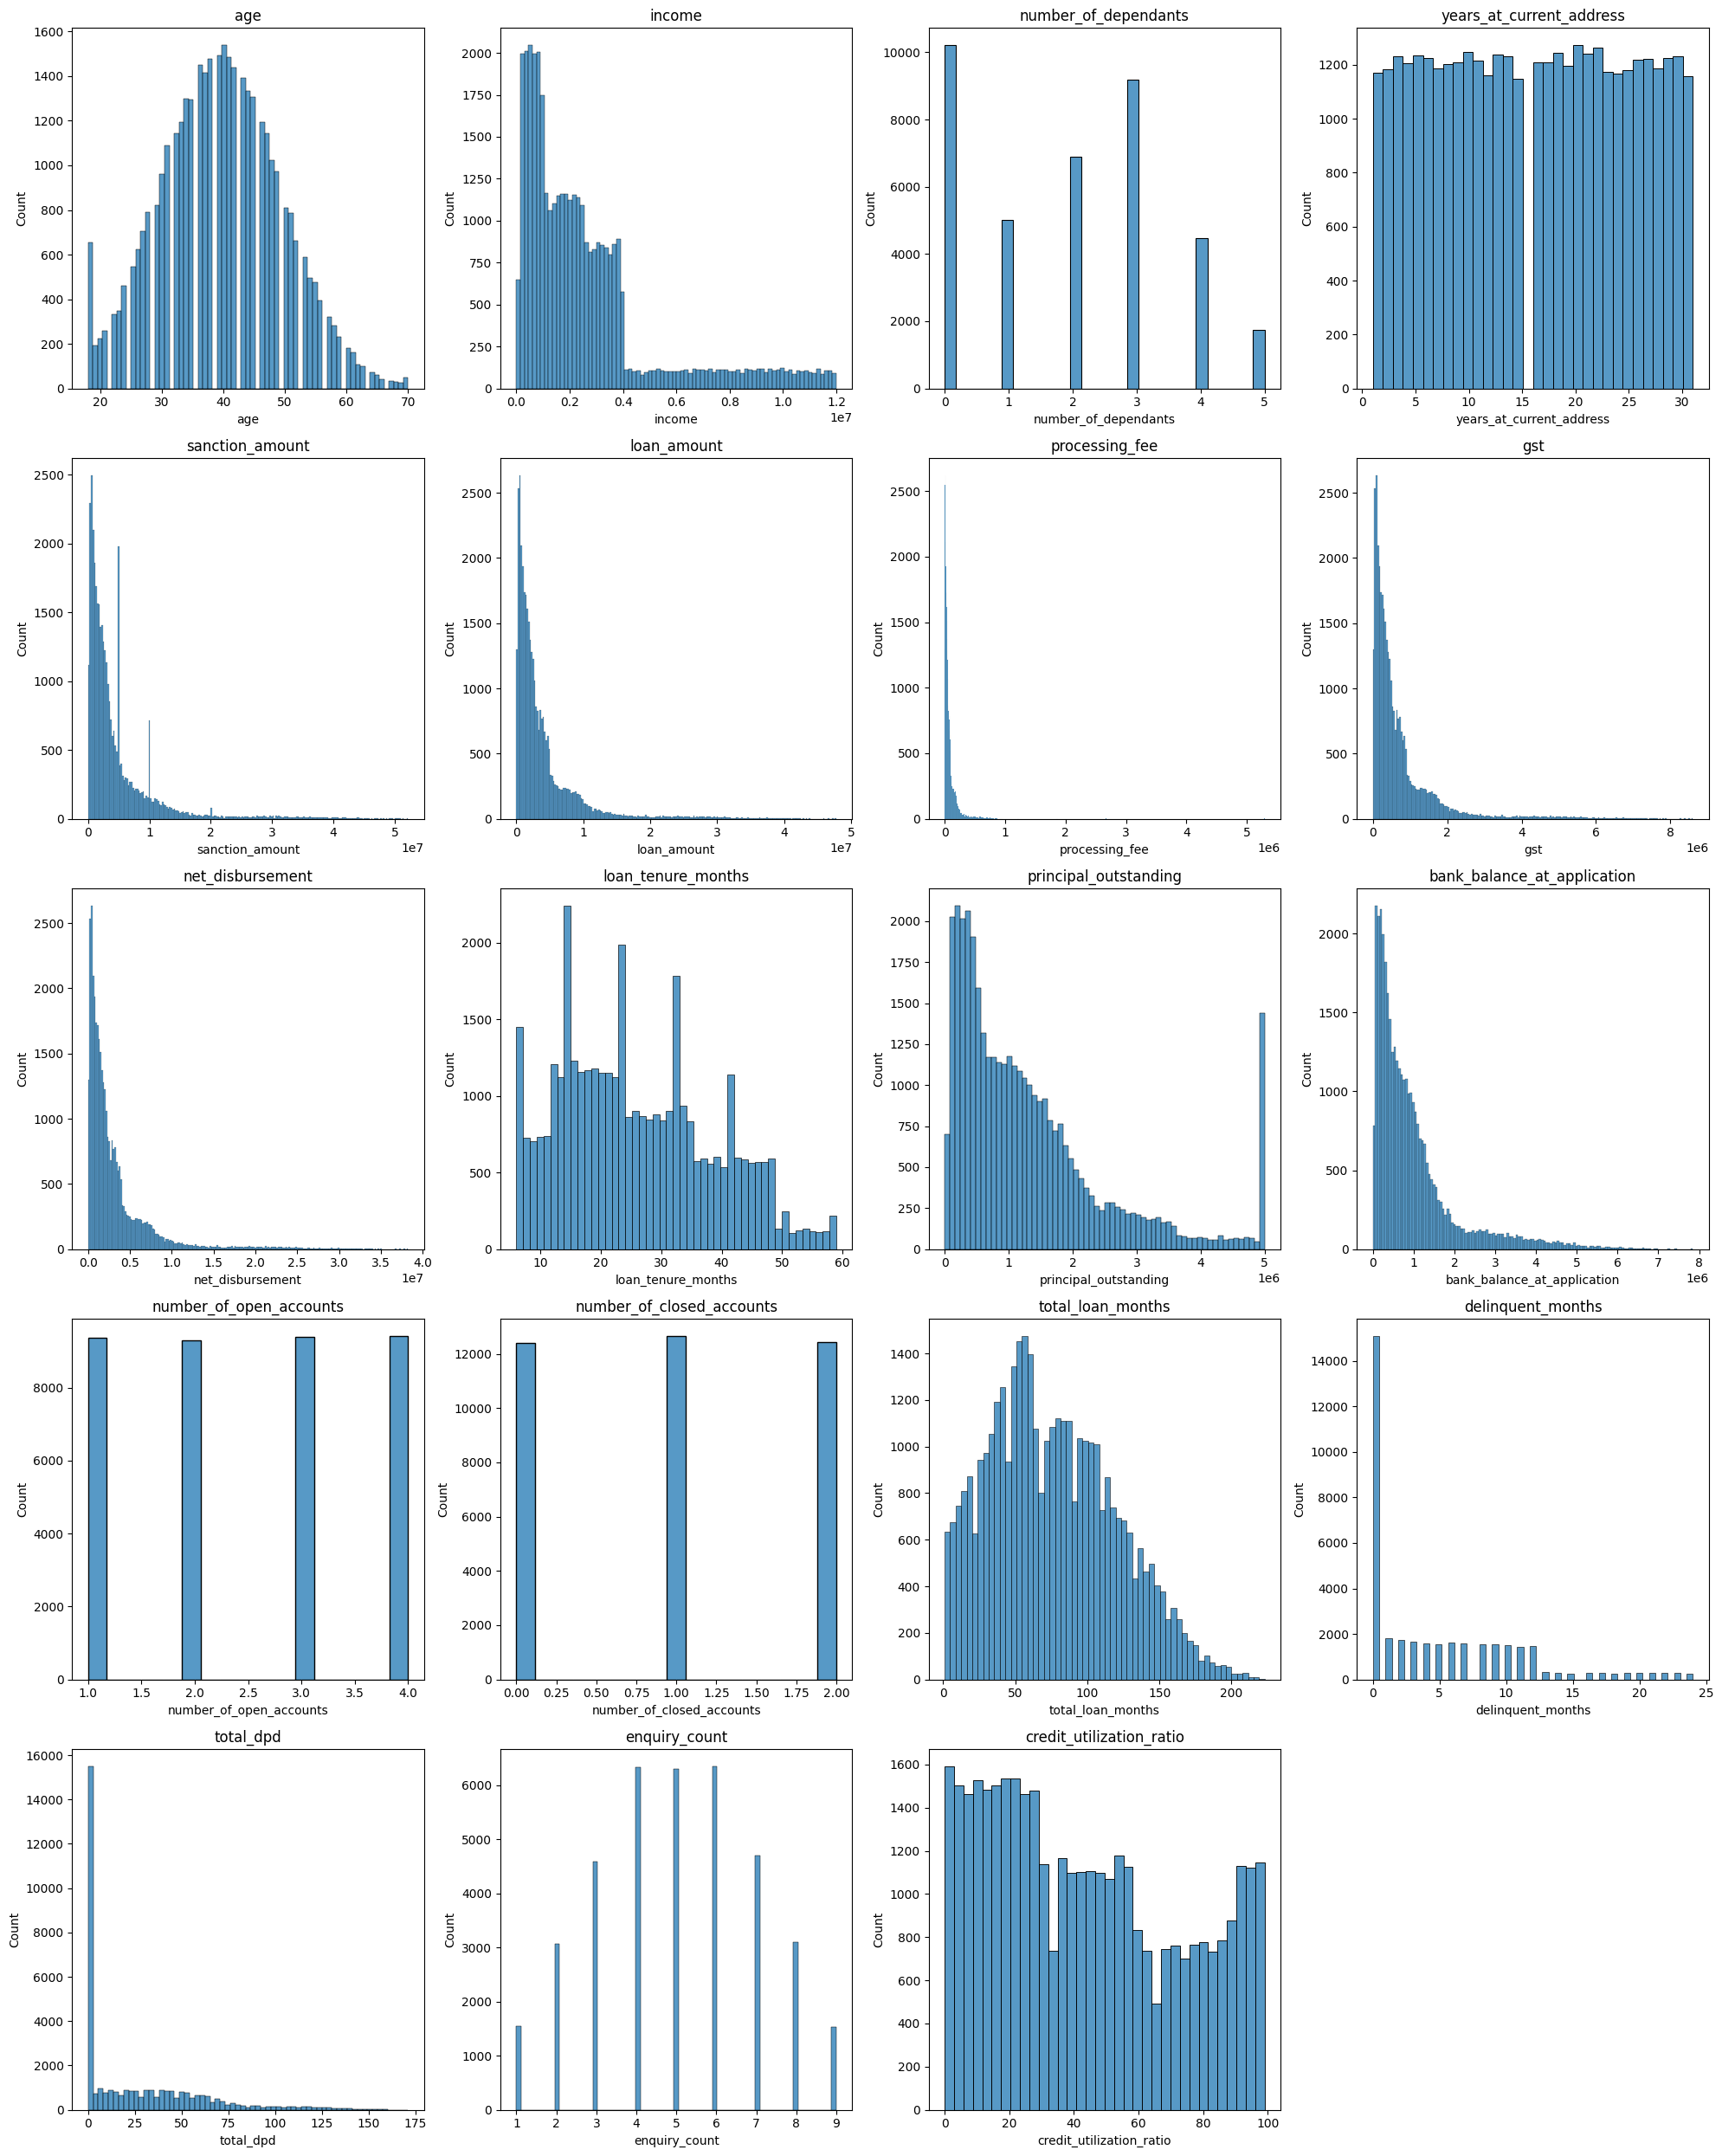

In [22]:
num_plots= len(columns_continuous)
num_col = 4
num_rows = (num_plots + num_col - 1) // num_col

fig, axes = plt.subplots(num_rows,num_col , figsize = (5*num_col,5*num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.histplot(x=df_train[col],ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, num_col*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Outlier Removal: Processing Fee

In [23]:
df_train['processing_fee'].describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [24]:
df_train['processing_fee'].max()

5293543.524214393

In [25]:
df_train[df_train['processing_fee']==df_train['processing_fee'].max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5293543.52


In [26]:
df_train[df_train['processing_fee']>df_train['loan_amount']][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


we can see that their are five entery where processing fee is greater than loan_amount which is not possible in real processing fee should be 3% of loan amount it varies according to bank varies so these are the outlier 

In [27]:
df_train[df_train['processing_fee']/df_train['loan_amount']>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


we can see that their are five are outlier these are low amount so we can simply remove by drop these rows of data

In [28]:
df_train_1 = df_train[df_train['processing_fee']/df_train['loan_amount']<0.03].copy()
df_train_1.shape

(37488, 33)

In [29]:
df_train_1['residence_type'].isna().sum()

0

In [30]:
# Apply same step on test set
df_test = df_test[df_test['processing_fee']/df_test['loan_amount']<0.03].copy()
df_test.shape

(12497, 33)

In [31]:
# Use other business rules for data validation
# Rule 1: GST should not be more than 20%

df_train_1[(df_train_1['gst']/df_train_1['loan_amount'])>0.2].shape

(0, 33)

In [32]:
# Rule 2: Net disbursement should not be higher than loan_amount
df_train_1[df_train_1['net_disbursement']>df_train_1['loan_amount']].shape

(0, 33)

No rows found that breaks rule 1 and rule 2

### Analyze Categorical Columns

In [33]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [34]:
for col in columns_categorical:
    print(col ,"-->" ,df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


### Fix Errors in Loan Purpose Column

In [35]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [36]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

<h3 style="color:blue" align="center">Exploratory Data Analysis</h3>

In [37]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

In [38]:
df_train_1['age'].describe()

count   37488.00
mean       39.54
std         9.86
min        18.00
25%        33.00
50%        39.00
75%        46.00
max        70.00
Name: age, dtype: float64

In [39]:
df_train_1.groupby('default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


**Insights**

1. Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default
1. Variability (standard deviation) is mostly similar in both the groups
1. Both the groups have similar min and max ages

In [40]:
df_train_1['age'][df_train_1['default']==1]

17207    48
1667     34
27077    39
33648    28
19720    45
         ..
43624    20
36473    40
26189    37
45236    39
37784    31
Name: age, Length: 3223, dtype: int64

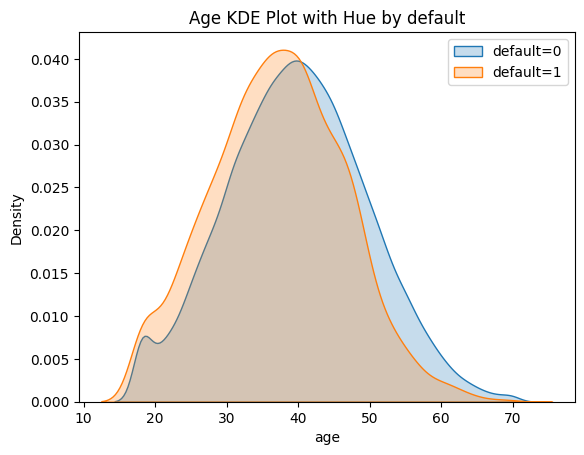

In [41]:
sns.kdeplot(df_train_1['age'][df_train_1['default']==0],fill=True,label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default']==1],fill=True,label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

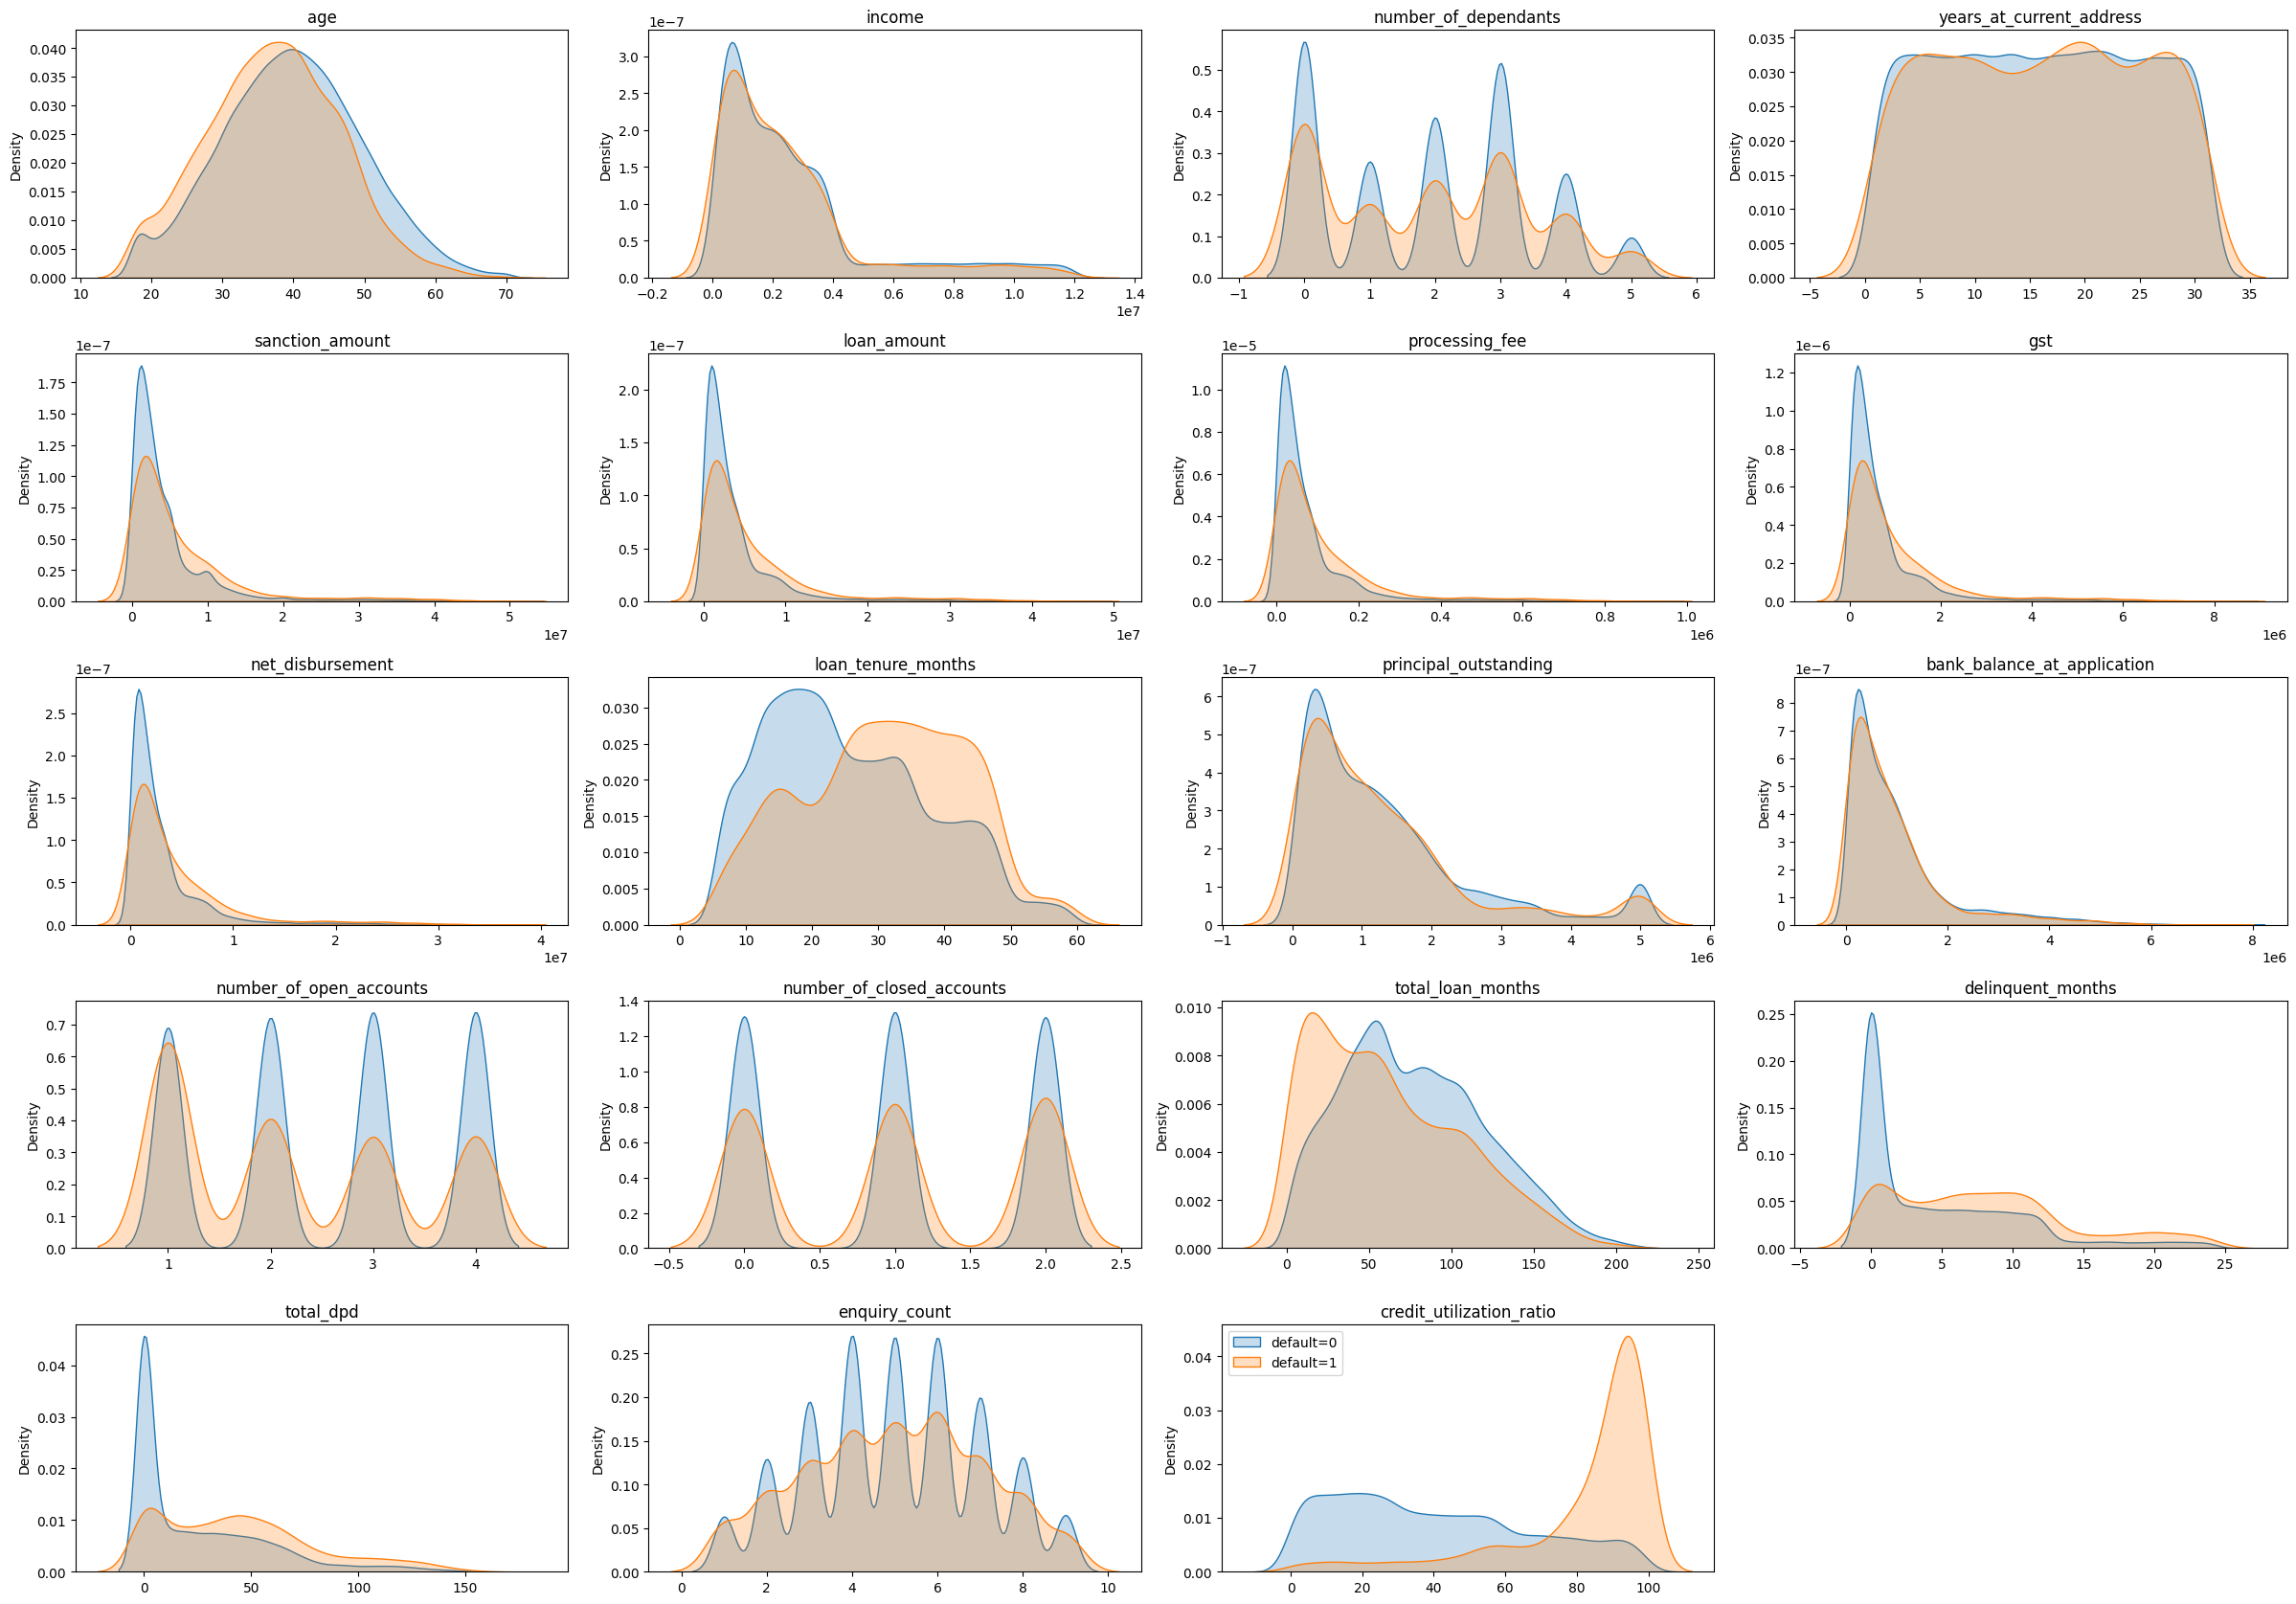

In [42]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0],fill=True,label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1],fill=True,label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.legend()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 style="color:blue" align="center">Feature Engineering, Feature Selection</h3>

#### Generate Loan to Income (LTI) Ratio

In [43]:
df_train_1[['loan_amount','income']].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [44]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: loan_to_income, dtype: float64

In [45]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)

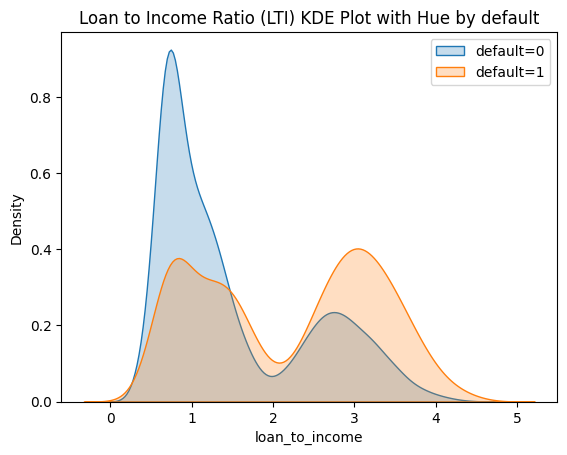

In [46]:
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==0],fill=True,label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==1],fill=True,label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [47]:
df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months']*100/df_train_1['total_loan_months'],2)
df_test['delinquency_ratio'] = round(df_test['delinquent_months']*100/df_test['total_loan_months'],2)

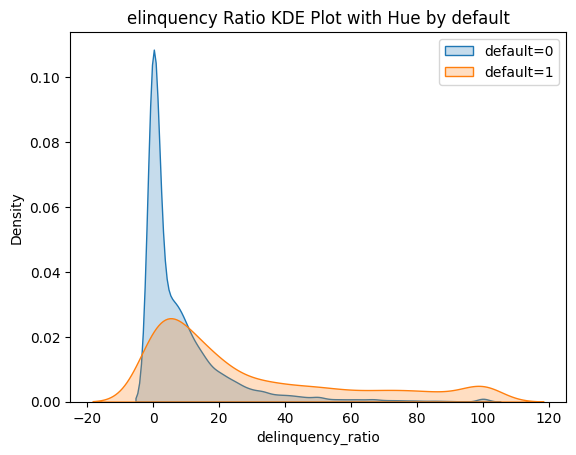

In [48]:
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default']==0],fill=True,label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default']==1],fill=True,label='default=1')
plt.title(f"elinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

#### Generate Avg DPD Per Delinquency

In [49]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months']!=0,
    round(df_train_1['total_dpd']/df_train_1['delinquent_months'],2),0
)
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months']!=0,
    round(df_test['total_dpd']/df_test['delinquent_months'],2),0
)


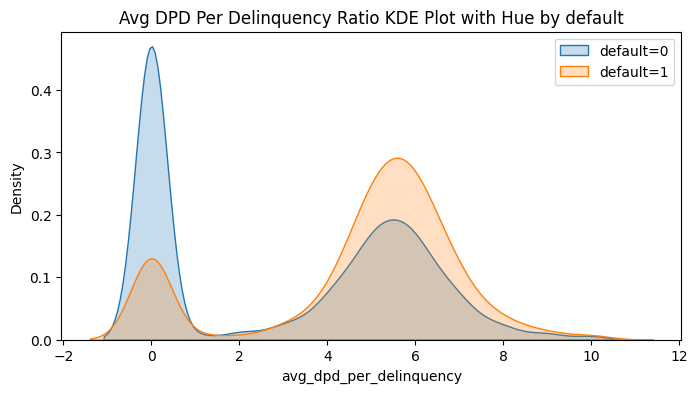

In [50]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

### Remove columns that are just unique ids and don't have influence on target

In [51]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [52]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'] ,axis=1)
df_test = df_test.drop(['cust_id','loan_id'],axis=1)

### Remove columns that business contact person asked us to remove

In [53]:
df_train_3 = df_train_2.drop(['disbursal_date','delinquent_months','total_dpd','installment_start_dt','income','loan_amount','total_loan_months'],axis=1)
df_test = df_test.drop(['disbursal_date','delinquent_months','total_dpd','installment_start_dt','income','loan_amount','total_loan_months'],axis=1)
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [54]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [55]:
X_train = df_train_3.drop(['default'],axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_train.select_dtypes(['int64','float64']).columns.drop('zipcode')

scaler= MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.describe()



,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,418876.24,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169029.87,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,400001.00,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,700001.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [56]:
X_test = df_test.drop(['default'],axis=1)
y_test = df_test['default']


X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,419759.82,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,168845.35,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,560001.00,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df= pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i ) for i in range(data.shape[1])]
    return vif_df

In [58]:
X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,500001,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,400001,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,600001,...,0.49,0.33,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,560001,...,0.64,0.20,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,411001,...,0.17,0.12,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [59]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [60]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif,axis=1)
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns.drop('zipcode')
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.27
1,number_of_dependants,2.72
2,years_at_current_address,3.34
3,loan_tenure_months,6.01
4,bank_balance_at_application,1.80
5,number_of_open_accounts,4.35
6,number_of_closed_accounts,2.35
7,enquiry_count,6.30
8,credit_utilization_ratio,2.88
9,loan_to_income,4.54


In [62]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [63]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [64]:
df_train_3[numeric_columns]

,age,number_of_dependants,years_at_current_address,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,59,3,30,28,4820526,4,2,4,36,2.07,13.16,5.90
32495,44,0,27,50,216697,3,1,5,5,1.61,6.25,6.20
43675,38,0,26,32,1383842,1,1,4,0,3.54,22.22,5.58
9040,42,2,30,40,626203,3,0,8,87,1.13,0.00,0.00
13077,58,4,29,15,585099,1,2,1,71,0.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,0,20,12,501594,2,0,5,13,0.57,0.00,0.00
5558,39,0,26,32,587429,1,0,4,44,1.11,26.92,5.14
45236,39,4,10,38,517025,4,2,6,97,3.37,8.46,4.00
49228,33,2,26,37,475147,2,1,6,25,1.48,0.00,0.00


In [65]:
df_train_3[numeric_columns.append(pd.Index(['default']))]

,age,number_of_dependants,years_at_current_address,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,default
12746,59,3,30,28,4820526,4,2,4,36,2.07,13.16,5.90,0
32495,44,0,27,50,216697,3,1,5,5,1.61,6.25,6.20,0
43675,38,0,26,32,1383842,1,1,4,0,3.54,22.22,5.58,0
9040,42,2,30,40,626203,3,0,8,87,1.13,0.00,0.00,0
13077,58,4,29,15,585099,1,2,1,71,0.50,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,70,0,20,12,501594,2,0,5,13,0.57,0.00,0.00,0
5558,39,0,26,32,587429,1,0,4,44,1.11,26.92,5.14,0
45236,39,4,10,38,517025,4,2,6,97,3.37,8.46,4.00,1
49228,33,2,26,37,475147,2,1,6,25,1.48,0.00,0.00,0


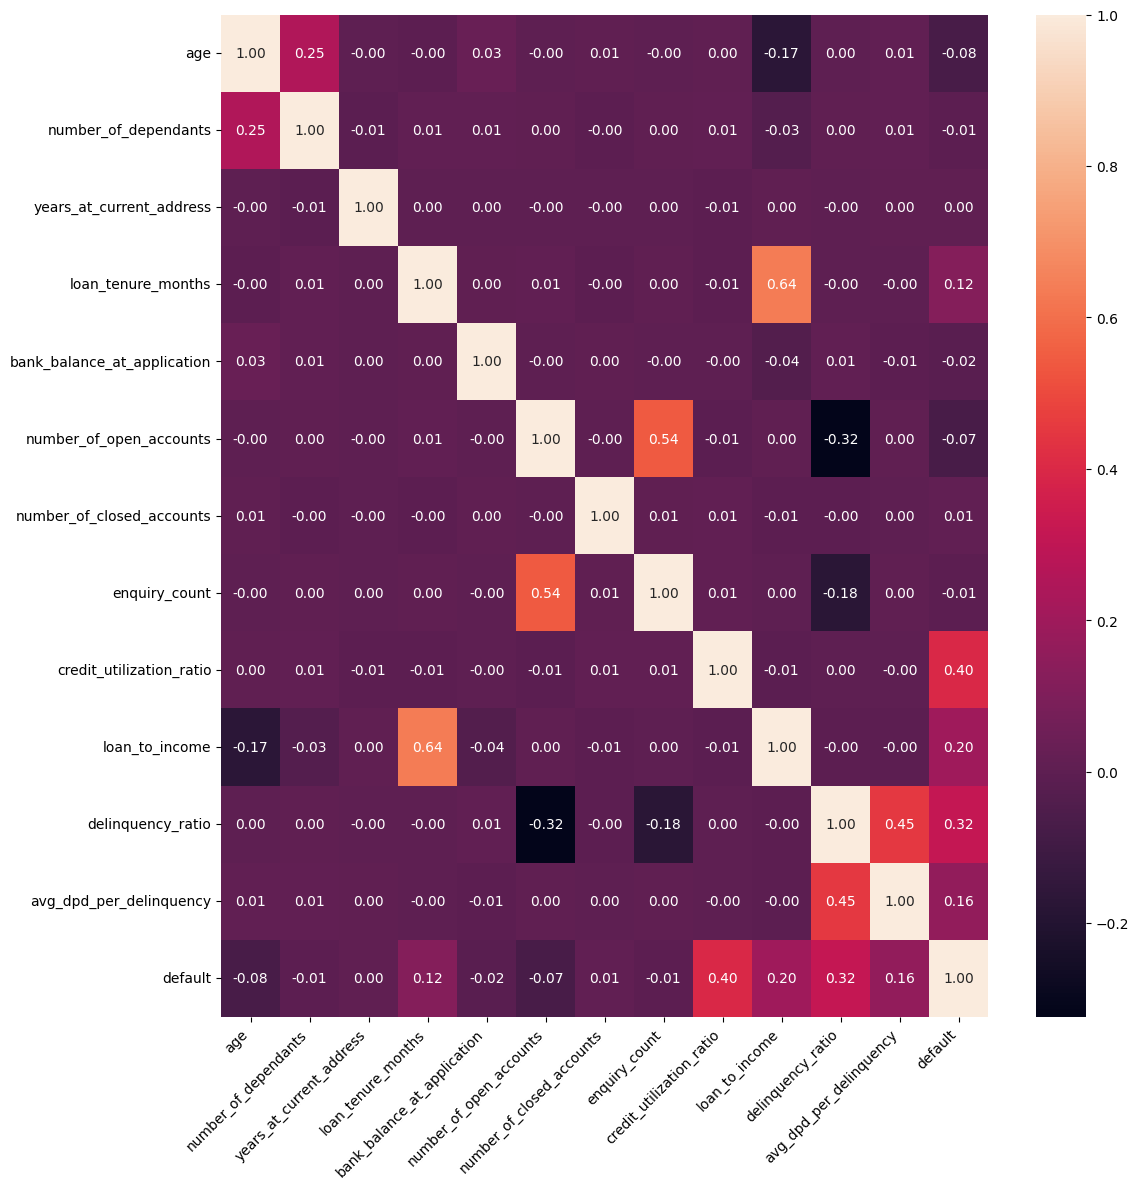

In [66]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, fmt="0.2f",annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features

In [67]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [68]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,500001,...,Secured,0.42,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,400001,...,Secured,0.83,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,600001,...,Secured,0.49,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,560001,...,Secured,0.64,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,411001,...,Unsecured,0.17,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [69]:
pd.concat([X_train_1, y_train],axis=1).groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


### Calculate WOE and IV

In [70]:
def calculate_woe_iv(df, feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns= {'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good']/total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = grouped['woe']*(grouped['good_pct'] - grouped['bad_pct'])

    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf],0)
    grouped['iv'] =  grouped['iv'].replace([np.inf, -np.inf],0)


    total_iv = grouped['iv'].sum()

    return grouped, total_iv
    

In [71]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1),'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [72]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [73]:
pd.cut(X_train_1['loan_to_income'],bins=10)

12746       (0.4, 0.5]
32495       (0.3, 0.4]
43675       (0.7, 0.8]
9040        (0.1, 0.2]
13077    (-0.001, 0.1]
             ...      
28515    (-0.001, 0.1]
5558        (0.1, 0.2]
45236       (0.7, 0.8]
49228       (0.2, 0.3]
37784       (0.1, 0.2]
Name: loan_to_income, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [74]:
iv_values = {}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),feature,'default')
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')

    iv_values[feature] = iv



iv_values


        

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40176623566177694}

In [75]:
iv_df = pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.35
19,delinquency_ratio,0.72
18,loan_to_income,0.48
20,avg_dpd_per_delinquency,0.40
10,loan_purpose,0.37
5,residence_type,0.25
12,loan_tenure_months,0.22
11,loan_type,0.16
0,age,0.09
14,number_of_open_accounts,0.08


In [76]:
iv_values.items()

dict_items([('age', 0.0890689462679479), ('gender', 0.00047449502170914947), ('marital_status', 0.001129766845390142), ('employment_status', 0.003953046301722585), ('number_of_dependants', 0.0019380899135053508), ('residence_type', 0.246745268718145), ('years_at_current_address', 0.0020800513608156363), ('city', 0.0019059578709781529), ('state', 0.0019005589806779287), ('zipcode', 0.0016677413243392572), ('loan_purpose', 0.3691197842282755), ('loan_type', 0.16319324904149224), ('loan_tenure_months', 0.21893515090196278), ('bank_balance_at_application', 0.0063187993277516365), ('number_of_open_accounts', 0.08463134083005877), ('number_of_closed_accounts', 0.0011964272592421567), ('enquiry_count', 0.007864214085342608), ('credit_utilization_ratio', 2.352965568168245), ('loan_to_income', 0.476415456948364), ('delinquency_ratio', 0.716576108689321), ('avg_dpd_per_delinquency', 0.40176623566177694)])

In [77]:
selected_features_iv = [feature for feature, iv, in iv_values.items() if iv >0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [78]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [79]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True,dtype='int')
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.79,0.42,1.00,0.36,0.41,0.13,0.59,1,0,0,1,0,0
32495,0.50,0.83,0.67,0.05,0.31,0.06,0.62,1,0,1,0,0,0
43675,0.38,0.49,0.00,0.00,0.76,0.22,0.56,0,0,0,1,0,0


In [80]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True , dtype='int')
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.35,0.75,0.33,0.99,0.55,0.00,0.00,1,0,0,1,0,0
15514,0.48,0.23,1.00,0.32,0.22,0.00,0.00,1,0,1,0,0,0
30367,0.23,0.55,0.67,0.83,0.18,0.00,0.00,1,0,0,0,0,0


<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [82]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [83]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [84]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'saga', 'liblinear', 'newton-cg']
    
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

random_search = RandomizedSearchCV(
    estimator = log_reg,
    param_distributions = param_dist,
    cv= 3,
    verbose=2,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_encoded,y_train)

print(f"Best Parameters : {random_search.best_params_}")
print(f"Nest score : {random_search.best_score_} ")

best_model = random_search.best_estimator_
y_pred  = best_model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters : {'solver': 'liblinear', 'C': 1438.44988828766}
Nest score : 0.7578060408520179 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [85]:


param_dist = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10 ],
    'learning_rate' : [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample' : [0.6, 0.7, 0.8, 0.9, 1.0 ],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

# Create the XGB Classifier  model
xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_dist,
    n_iter=100,
    cv= 3,
    verbose=1,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_encoded,y_train)

print(f"Best Parameters : {random_search.best_params_}")
print(f"Nest score : {random_search.best_score_} ")

best_model = random_search.best_estimator_
y_pred  = best_model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters : {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Nest score : 0.7870271788189026 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.82      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.96      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [86]:
y_train.value_counts()

default
0    34265
1     3223
Name: count, dtype: int64

In [87]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus =  rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [88]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.66      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [89]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.68      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [90]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_encoded, y_train)
y_train_sm.value_counts()

default
0    34199
1    34199
Name: count, dtype: int64

In [91]:
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [92]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [93]:
def objective(trials):
    params={
    'C' : trials.suggest_float("C", 1e-4, 1e4, log=True),
    'solver' : trials.suggest_categorical('solver',["newton-cg", "lbfgs", "liblinear", "sag", "saga"]),
    'tol': trials.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
    'class_weight': trials.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights      
    }
    model = LogisticRegression(**params, max_iter=10000)
    f1_scorer = make_scorer(f1_score, average= 'macro')
    scores  = cross_val_score(model,X_train_sm,y_train_sm, cv= 3,scoring= f1_scorer,n_jobs=-1)
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-11-07 11:52:22,410] A new study created in memory with name: no-name-109e9ea3-d8c0-4142-9032-e6fc45c69af0
[I 2025-11-07 11:52:22,653] Trial 0 finished with value: 0.9225765875958651 and parameters: {'C': 0.004202160889239785, 'solver': 'sag', 'tol': 0.0024903765145580536, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9225765875958651.
[I 2025-11-07 11:52:23,120] Trial 1 finished with value: 0.9456997279947132 and parameters: {'C': 13.497360364104763, 'solver': 'newton-cg', 'tol': 7.222894907460543e-06, 'class_weight': None}. Best is trial 1 with value: 0.9456997279947132.
[I 2025-11-07 11:52:23,563] Trial 2 finished with value: 0.9456856919837988 and parameters: {'C': 378.8513139904122, 'solver': 'newton-cg', 'tol': 3.1932940336128034e-05, 'class_weight': None}. Best is trial 1 with value: 0.9456997279947132.
[I 2025-11-07 11:52:23,762] Trial 3 finished with value: 0.913400961066861 and parameters: {'C': 0.0017615039073843148, 'solver': 'lbfgs', 'tol': 1.9512565941

In [94]:
print('Best_trial: ')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print("prams")
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_sm,y_train_sm)

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)


Best_trial: 
  F1-score: 0.945860682325152
prams
    C: 265.9316088534296
    solver: lbfgs
    tol: 0.0003488941959817388
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [95]:
def objective(trial):
    params={
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)    
    }
    model = XGBClassifier(**params)
    f1_scorer = make_scorer(f1_score, average= 'macro')
    scores  = cross_val_score(model,X_train_sm,y_train_sm, cv= 3,scoring= f1_scorer,n_jobs=-1)
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-11-07 11:52:39,340] A new study created in memory with name: no-name-8d79f7e7-3c86-46d1-b9fc-91fbb5481f59
[I 2025-11-07 11:52:40,270] Trial 0 finished with value: 0.9368288855065411 and parameters: {'lambda': 2.1200129362049656, 'alpha': 0.0011815696716621594, 'subsample': 0.4156767478852091, 'colsample_bytree': 0.5881769434939184, 'max_depth': 3, 'eta': 0.15636871735809754, 'gamma': 1.3036970819140714, 'scale_pos_weight': 6.787852380049312, 'min_child_weight': 5, 'max_delta_step': 10}. Best is trial 0 with value: 0.9368288855065411.
[I 2025-11-07 11:52:41,627] Trial 1 finished with value: 0.9563844350985603 and parameters: {'lambda': 2.391292947703978, 'alpha': 0.2739916912689352, 'subsample': 0.43556329241687486, 'colsample_bytree': 0.5741259736116221, 'max_depth': 10, 'eta': 0.15907168896483276, 'gamma': 6.813645137696051, 'scale_pos_weight': 7.629456733344492, 'min_child_weight': 10, 'max_delta_step': 4}. Best is trial 1 with value: 0.9563844350985603.
[I 2025-11-07 11:52:4

In [96]:
print('Best_trial: ')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print("prams")
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_sm,y_train_sm)

y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)


Best_trial: 
  F1-score: 0.9751064350701193
prams
    lambda: 0.07997891291009002
    alpha: 0.008457775515569263
    subsample: 0.5834639875402003
    colsample_bytree: 0.7410177442537811
    max_depth: 10
    eta: 0.17629928680361331
    gamma: 0.011839585063392555
    scale_pos_weight: 5.873438289307987
    min_child_weight: 3
    max_delta_step: 2
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.66      0.89      0.76      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.92      0.87     12497
weighted avg       0.96      0.95      0.96     12497



## Model Evaluation : ROC/AUC

In [97]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [98]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

fpr, tpr, threshold = roc_curve(y_test, probabilities)
fpr[:5],tpr[:5],threshold[:5]

    

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.15921788, 0.15921788, 0.17504655]),
 array([       inf, 1.        , 0.99953962, 0.99952981, 0.99943193]))

In [99]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
print(area)

0.9836189229772792


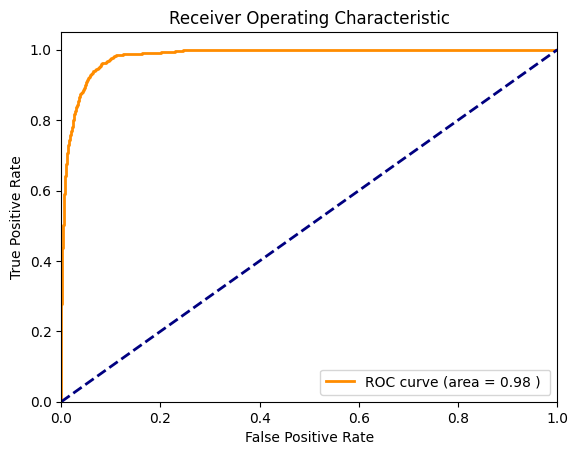

In [100]:
plt.figure()
plt.plot(fpr, tpr, color = "darkorange", lw= 2, label = "ROC curve (area = %0.2f ) "%area)
plt.plot([0, 1], [0, 1], color = 'navy', lw= 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [113]:
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head()

,Default Truth,Default Probability
19205,0,0.53
15514,0,0.00
30367,0,0.01
35347,0,0.01
41814,1,0.92


In [114]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'],10,labels=False,duplicates='drop')
df_eval.head()

,Default Truth,Default Probability,Decile
19205,0,0.53,8
15514,0,0.00,2
30367,0,0.01,6
35347,0,0.01,6
41814,1,0.92,9


In [115]:
df_eval.groupby('Decile')['Default Probability'].min()

Decile
0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
5   0.00
6   0.00
7   0.03
8   0.21
9   0.82
Name: Default Probability, dtype: float64

In [117]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non Events': x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_decile.reset_index(inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events
0,0,0.00,0.00,0.00,1250.00
1,1,0.00,0.00,0.00,1250.00
2,2,0.00,0.00,0.00,1249.00
3,3,0.00,0.00,0.00,1250.00
4,4,0.00,0.00,0.00,1250.00
5,5,0.00,0.00,0.00,1249.00
6,6,0.00,0.03,5.00,1245.00
7,7,0.03,0.21,9.00,1240.00
8,8,0.21,0.82,162.00,1088.00
9,9,0.82,1.00,898.00,352.00


In [118]:
df_decile['Events'].sum()

1074.0

In [119]:
df_decile['Event Rate'] = (df_decile['Events']*100)/(df_decile['Events'] + df_decile['Non Events'])
df_decile['Non Event Rate'] = (df_decile['Non Events']*100)/(df_decile['Events'] + df_decile['Non Events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate
0,0,0.00,0.00,0.00,1250.00,0.00,100.00
1,1,0.00,0.00,0.00,1250.00,0.00,100.00
2,2,0.00,0.00,0.00,1249.00,0.00,100.00
3,3,0.00,0.00,0.00,1250.00,0.00,100.00
4,4,0.00,0.00,0.00,1250.00,0.00,100.00
5,5,0.00,0.00,0.00,1249.00,0.00,100.00
6,6,0.00,0.03,5.00,1245.00,0.40,99.60
7,7,0.03,0.21,9.00,1240.00,0.72,99.28
8,8,0.21,0.82,162.00,1088.00,12.96,87.04
9,9,0.82,1.00,898.00,352.00,71.84,28.16


In [120]:
df_decile = df_decile.sort_values(by='Decile',ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16
1,8,0.21,0.82,162.00,1088.00,12.96,87.04
2,7,0.03,0.21,9.00,1240.00,0.72,99.28
3,6,0.00,0.03,5.00,1245.00,0.40,99.60
4,5,0.00,0.00,0.00,1249.00,0.00,100.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00


In [121]:
df_decile['Cum Events'] = df_decile['Events'].cumsum()
df_decile['Cum Non Events'] = df_decile['Non Events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00


In [122]:
df_decile['Cum Event Rate'] = (df_decile['Cum Events']*100)/df_decile['Events'].sum()
df_decile['Cum Non Event Rate'] = (df_decile['Cum Non Events']*100)/df_decile['Non Events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events,Cum Event Rate,Cum Non Event Rate
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00,98.70,12.61
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00,99.53,23.46
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00


In [123]:
df_decile['KS'] = df_decile['Cum Event Rate'] - df_decile['Cum Non Event Rate']
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non Events,Event Rate,Non Event Rate,Cum Events,Cum Non Events,Cum Event Rate,Cum Non Event Rate,KS
0,9,0.82,1.00,898.00,352.00,71.84,28.16,898.00,352.00,83.61,3.08,80.53
1,8,0.21,0.82,162.00,1088.00,12.96,87.04,1060.00,1440.00,98.70,12.61,86.09
2,7,0.03,0.21,9.00,1240.00,0.72,99.28,1069.00,2680.00,99.53,23.46,76.07
3,6,0.00,0.03,5.00,1245.00,0.40,99.60,1074.00,3925.00,100.00,34.36,65.64
4,5,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,5174.00,100.00,45.29,54.71
5,4,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,6424.00,100.00,56.24,43.76
6,3,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,7674.00,100.00,67.18,32.82
7,2,0.00,0.00,0.00,1249.00,0.00,100.00,1074.00,8923.00,100.00,78.11,21.89
8,1,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,10173.00,100.00,89.06,10.94
9,0,0.00,0.00,0.00,1250.00,0.00,100.00,1074.00,11423.00,100.00,100.00,0.00


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 71.84% and a non-event rate of 28.16%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.96%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 86.09%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [124]:
gini_coefficient = 2 * area -1
print("AUC:",area)
print("Gini Coefficient:",gini_coefficient)

AUC: 0.9836189229772792
Gini Coefficient: 0.9672378459545583


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

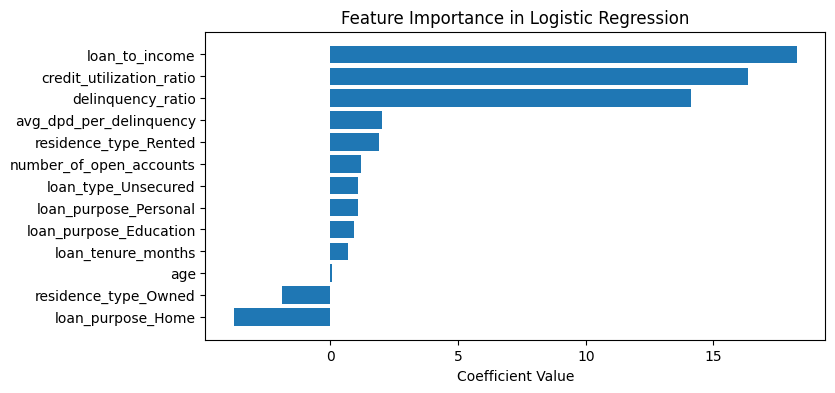

In [130]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance,index=X_train_encoded.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending = True)

plt.figure(figsize=(8,4))

plt.barh(coef_df.index,coef_df['Coefficients'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [131]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.35,0.75,0.33,0.99,0.55,0.00,0.00,1,0,0,1,0,0
15514,0.48,0.23,1.00,0.32,0.22,0.00,0.00,1,0,1,0,0,0


In [134]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [135]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [136]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [ ]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data,'../artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [139]:
final_model.coef_, final_model.intercept_

(array([[ 0.0791688 ,  0.67361822,  1.21014077, 16.33963689, 18.28399531,
         14.10952108,  2.02467538, -1.88494968,  1.88900054,  0.92408676,
         -3.79102624,  1.09563304,  1.09563304]]),
 array([-21.39655044]))